In [1]:
import folium
import pandas as pd
import h3
from shapely.geometry import Polygon, Point
import shapely.wkt
from geojson import Point, Feature, FeatureCollection, dump
import os
import matplotlib.pyplot as plt

# Create a GeoJson

### First find all used hexagons

In [2]:
#Get this file from scibo
df = pd.read_csv('sharenow_supply_data_6mo.csv')

df_StartEnd = df[['hex_start_7','hex_end_7']]

list_StartUnique = list(df['hex_start_7'].unique())
list_EndUnique = list(df['hex_end_7'].unique())
list_UniqueHexs = list(pd.Series(list_StartUnique+list_EndUnique).unique())

### Now get the cornerstones

In [3]:
def output_h3_id_attributes(h3_id):
    return Polygon(h3.h3_to_geo_boundary(h3_id, geo_json=True))

In [4]:
features = []
for hexID in list_UniqueHexs:
    features.append(Feature(geometry=output_h3_id_attributes(hexID), properties={"hexID": hexID}))

feature_collection = FeatureCollection(features)

with open('berlin_charger.geojson', 'w') as f:
   dump(feature_collection, f)

# Visulise

In [5]:
map = folium.Map(location=[52.518839, 13.399304], default_zoom_start=30)

In [10]:
chargerPerHex = pd.read_csv('charger_in_hex.csv')
finalData = chargerPerHex[['hexID']]
chargerPerHex = chargerPerHex[['x1','x2','x3']].sum(axis=1)
finalData['charger'] = chargerPerHex

In [9]:
#Avoid black points 
#Get all hex ids

for id in list_StartUnique:
    if id not in finalData['hexID'].unique():
        finalData = finalData.append({'hexID':id,'charger':0},ignore_index=True)

In [8]:
map.choropleth(geo_data="berlin_charger.geojson",
             data=finalData, 
             columns=['hexID', 'charger'], 
             key_on='feature.properties.hexID', 
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Charger')
map

## Sensitivities

In [11]:
plt.style.use('seaborn')
figsize = (16,9)

### Beta

In [12]:
path = "./sensitivity/beta/"
df_charger_beta = pd.DataFrame()
df_E_not_supplied_beta = pd.DataFrame()

for file in os.listdir(path):
    if "charger" in file:
        df_charger_beta["beta_"+file.split("_")[-1].split(".c")[0]] = \
            pd.read_csv((path+file)).sum()

    elif "E_not_supplied" in file:
        df_E_not_supplied_beta["beta_"+file.split("_")[-1].split(".c")[0]] = \
            pd.read_csv((path+file)).sum()

    elif "cost_dict" in file:
        df_cost_beta = pd.read_csv((path+file))
        df_cost_beta.columns = ["Beta", "Total Cost"]
        df_cost_beta.set_index("Beta", inplace=True)
        df_cost_beta.sort_index(inplace=True)
        
    elif "cvar_dict" in file:
        df_cvar_beta = pd.read_csv((path+file))
        df_cvar_beta.columns = ["Beta", "cvar"]
        df_cvar_beta.set_index("Beta", inplace=True)
        df_cvar_beta.sort_index(inplace=True)

FileNotFoundError: [WinError 3] Das System kann den angegebenen Pfad nicht finden: './sensitivity/beta/'

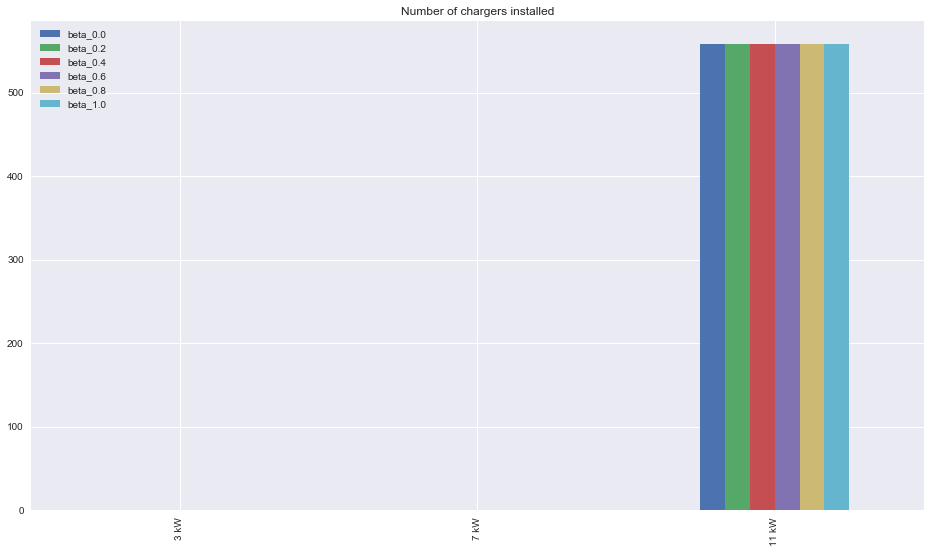

In [26]:
df_charger_beta.index = ["3 kW", "7 kW", "11 kW"]
df_charger_beta.plot(kind="bar", figsize = figsize, title="Number of chargers installed")

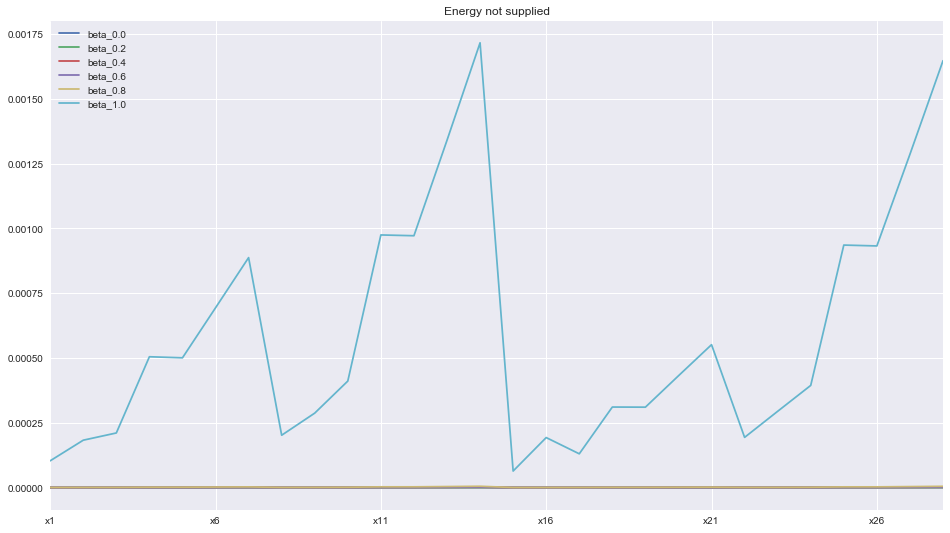

In [27]:
df_E_not_supplied_beta.plot(title="Energy not supplied", figsize = figsize)

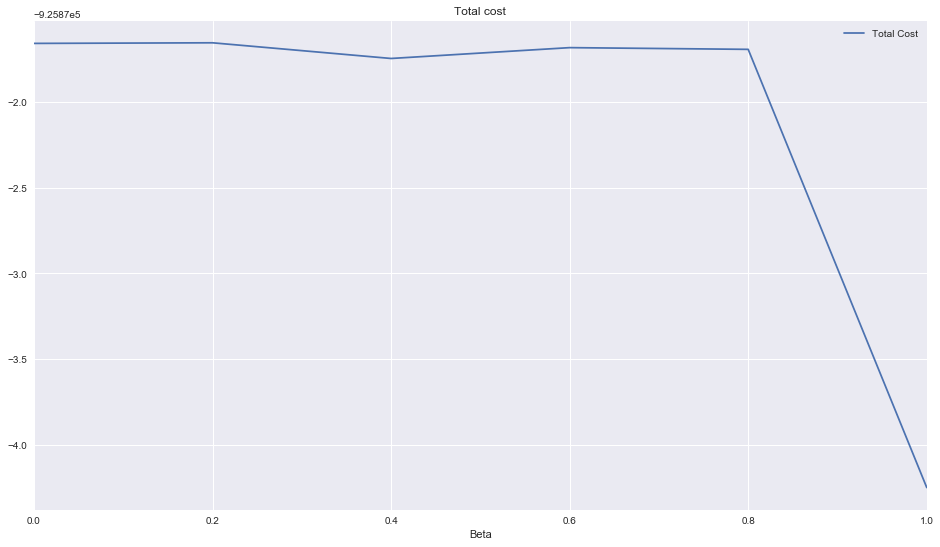

In [28]:
df_cost_beta.plot(title="Total cost", figsize = figsize)

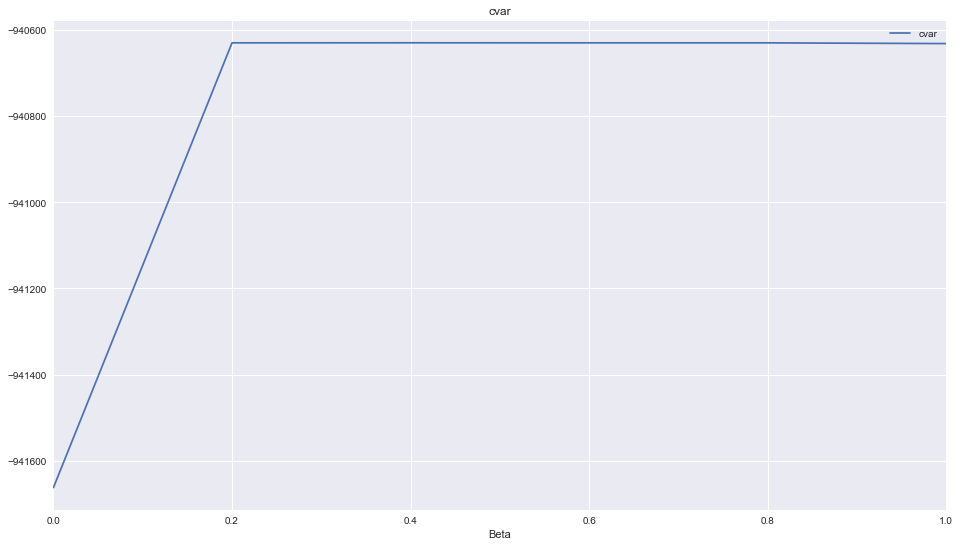

In [29]:
df_cvar_beta.plot(title="cvar", figsize = figsize)

## Opportunity Cost

In [30]:
path = "./sensitivity/opportunity/"
df_charger_opc = pd.DataFrame()
df_E_not_supplied_opc = pd.DataFrame()

for file in os.listdir(path):
    if "charger" in file:
        df_charger_opc["op_cost_"+file.split("_")[-1].split(".c")[0]] = \
            pd.read_csv((path+file)).sum()

    elif "E_not_supplied" in file:
        df_E_not_supplied_opc["op_cost_"+file.split("_")[-1].split(".c")[0]] = \
            pd.read_csv((path+file)).sum()

    elif "cost_dict" in file:
        df_cost_opc = pd.read_csv((path+file))
        df_cost_opc.columns = ["Opportunity Cost", "Total Cost"]
        df_cost_opc.set_index("Opportunity Cost", inplace=True)
        df_cost_opc.sort_index(inplace=True)
        
    elif "cvar_dict" in file:
        df_cvar_opc = pd.read_csv((path+file))
        df_cvar_opc.columns = ["Opportunity Cost", "cvar"]
        df_cvar_opc.set_index("Opportunity Cost", inplace=True)
        df_cvar_opc.sort_index(inplace=True)

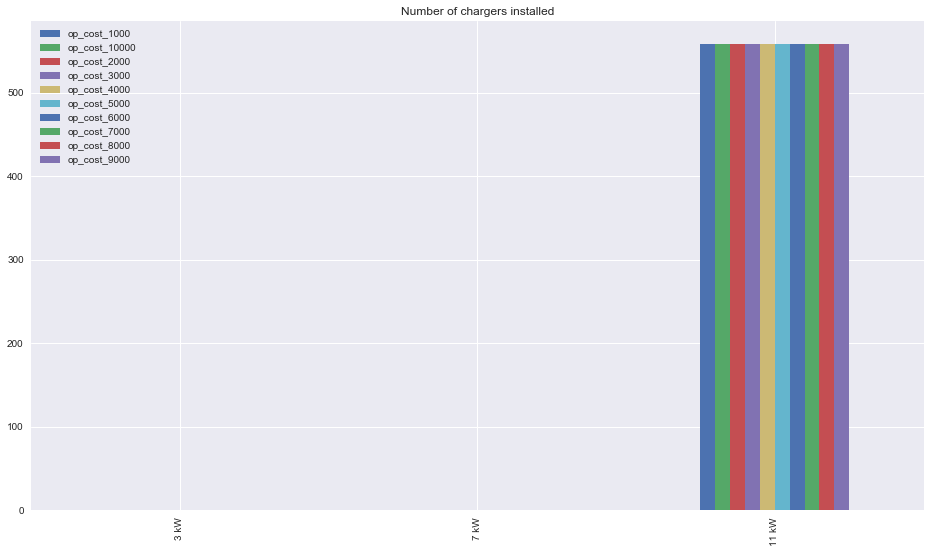

In [32]:
df_charger_opc.index = ["3 kW", "7 kW", "11 kW"]
df_charger_opc.plot(kind="bar", figsize = figsize, title="Number of chargers installed")

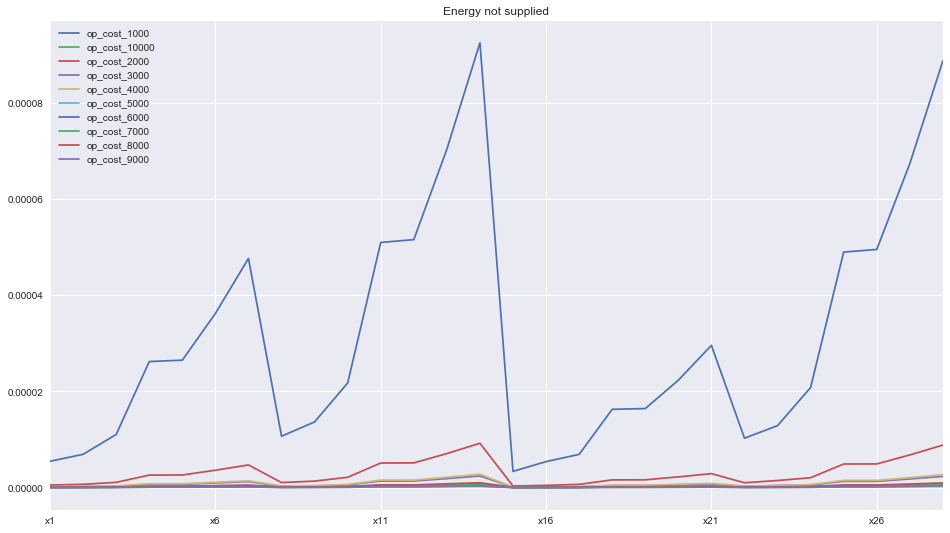

In [33]:
df_E_not_supplied_opc.plot(title="Energy not supplied", figsize = figsize)

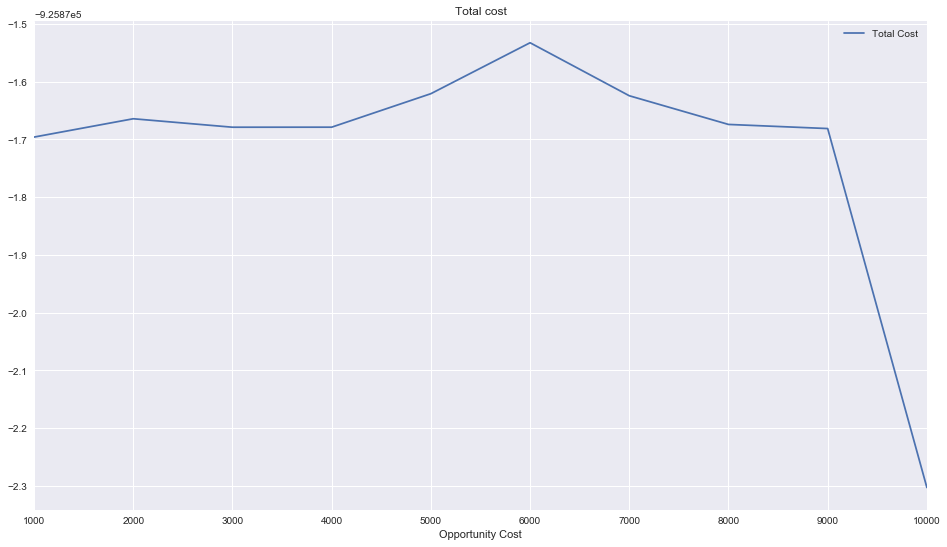

In [34]:
df_cost_opc.plot(title="Total cost", figsize = figsize)

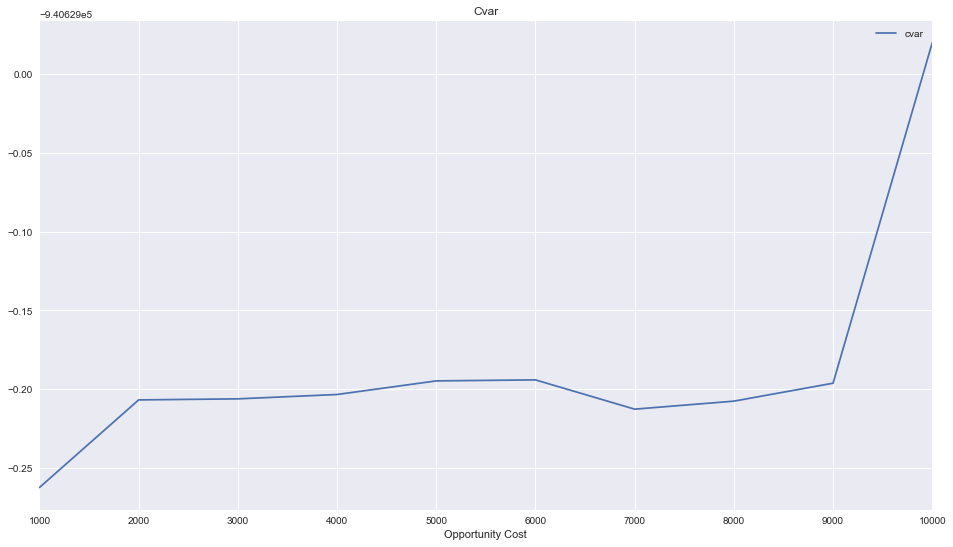

In [35]:
df_cvar_opc.plot(title="Cvar", figsize = figsize)

## Charging hours

In [46]:
path = "./sensitivity/hours/"
df_charger_hours = pd.DataFrame()
df_E_not_supplied_hours = pd.DataFrame()

for file in os.listdir(path):
    if "charger" in file:
        df_charger_hours["hours_"+file.split("_")[-1].split(".c")[0]] = \
            pd.read_csv((path+file)).sum()

    elif "E_not_supplied" in file:
        df_E_not_supplied_hours["hours_"+file.split("_")[-1].split(".c")[0]] = \
            pd.read_csv((path+file)).sum()

    elif "cost_dict" in file:
        df_cost_hours = pd.read_csv((path+file))
        df_cost_hours.columns = ["Hours for charging", "Total Cost"]
        df_cost_hours.set_index("Hours for charging", inplace=True)
        df_cost_hours.sort_index(inplace=True)
        
    elif "cvar_dict" in file:
        df_cvar_hours = pd.read_csv((path+file))
        df_cvar_hours.columns = ["Hours for charging", "cvar"]
        df_cvar_hours.set_index("Hours for charging", inplace=True)
        df_cvar_hours.sort_index(inplace=True)

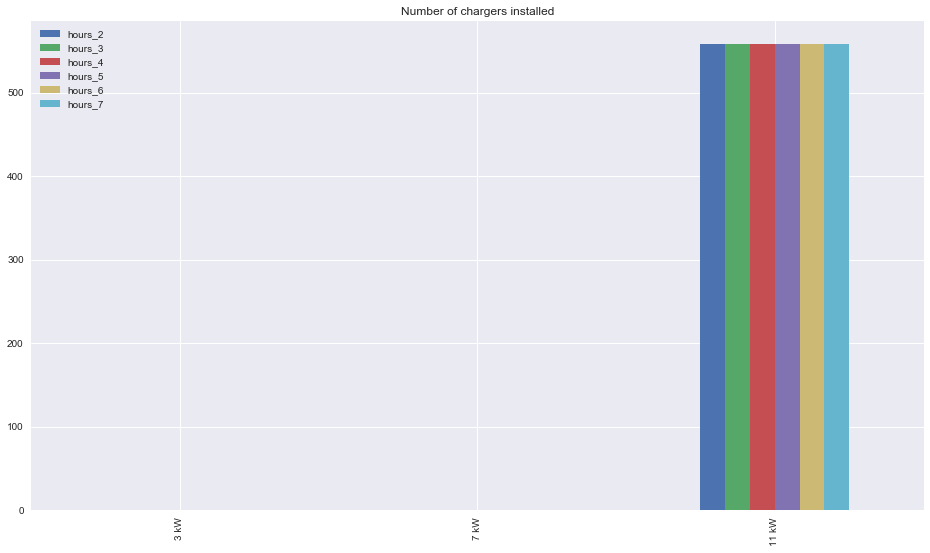

In [47]:
df_charger_hours.index = ["3 kW", "7 kW", "11 kW"]
df_charger_hours.plot(kind="bar", title="Number of chargers installed", figsize = figsize)

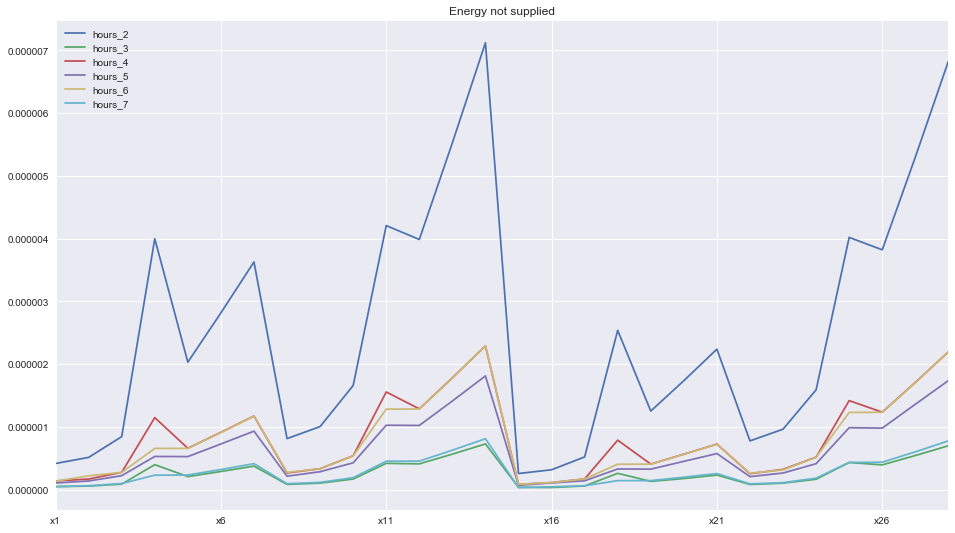

In [48]:
df_E_not_supplied_hours.plot(title="Energy not supplied", figsize = figsize)

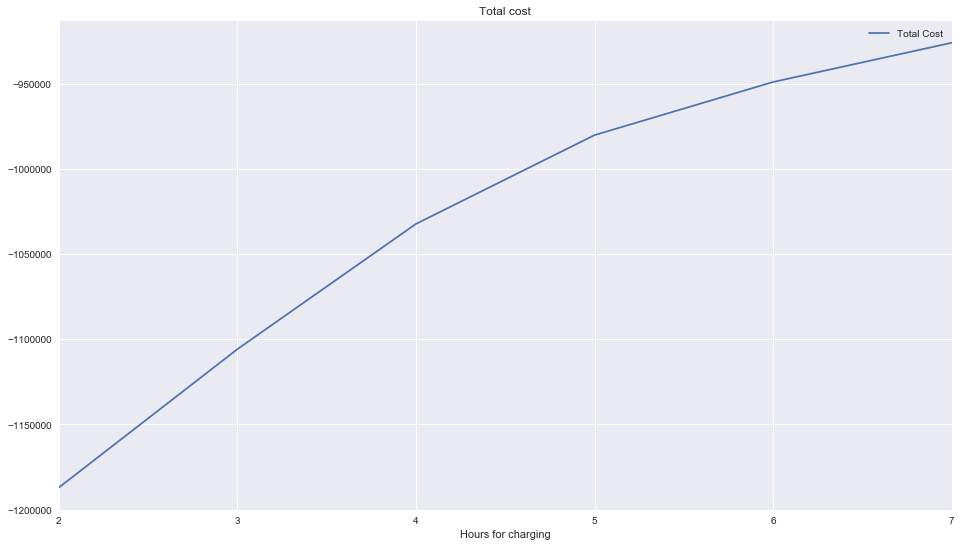

In [49]:
df_cost_hours.plot(title="Total cost", figsize = figsize)

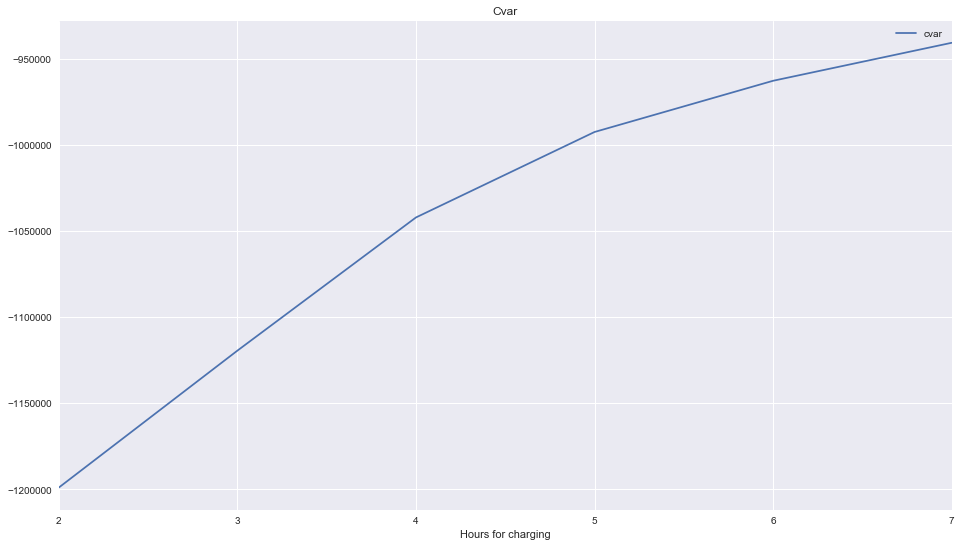

In [50]:
df_cvar_hours.plot(title="Cvar", figsize = figsize)